In [24]:
using Plots
using Distributions
#pyplot()

# 概要

- 二项分布
- Poisson分布
- 正态分布

---

$$ Var(kx) = k^2 Var(x) $$

# 二项分布
在概率论中，称只有两种可能结果的随机实验为Bernoulli试验。

若每次试验的结果是且只能是事件A发生或不发生这两个相互对立的结果之一，事件A出现的概率为$\pi$，不出现的概率为$1-\pi$，设X为“事件A出现的次数”，则n次独立重复试验后，事件A出现的次数X服从二项分布，记为$X \sim B(n, \pi)$：

$$ P(X = x) = \mathrm{C}_n^x (1-\pi)^{n-x} \pi^x $$

其中: $$ \mathrm{C}_n^x = \frac{n!}{x! (n-x)!} $$

### 性质与特点
- $x \in \mathbb{N}$
- X的总体均数为 $\mu = n \pi$
- X的总体方差为 $\sigma^2 = n \pi (1-\pi)$
- 经验上，当$n \pi > 5$同时$n (1 - \pi)>5$时，可近似认为对称。

### 条件
- 每次试验只有两种可能的结果
- 各次试验相互独立
- 发生成功事件的概率不变


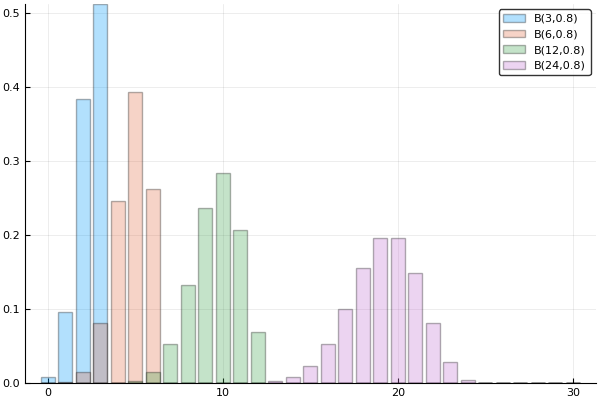

In [32]:
bar(x -> pdf(Binomial(3, 0.8),x), 0:30, alpha=0.3, label="B(3,0.8)")
bar!(x -> pdf(Binomial(6, 0.8),x), 0:30, alpha=0.3, label="B(6,0.8)")
bar!(x -> pdf(Binomial(12, 0.8),x), 0:30, alpha=0.3, label="B(12,0.8)")
bar!(x -> pdf(Binomial(24, 0.8),x), 0:30, alpha=0.3, label="B(24,0.8)")

# Poisson 分布
通常用来描述随机事件A在单位时间（或单位空间）内发生次数X的概率分布。记为$X \sim P(\mu)$

$$ P(X = k) = \frac{\mu^k}{k!}e^{-mu} $$

### 性质与特点
- 离散型分布
- mu为均数，也为方差。可作为是否为Poisson的依据。
- 设$X_1 \sim P(\mu_1),\; X_2 \sim P(\mu_2)$，并且$X_1$和$X_2$相互独立，则$Y = X_1 + X_2$满足$Y \sim P(\mu_1+\mu_2)$
- 当$n \to \infty$时，二项分布近似于Poisson分布。因此当n很大而pi很小时，可以用Poisson分布近似二项分布。

### 条件
- 平稳性
- 独立增量性
- 普通性


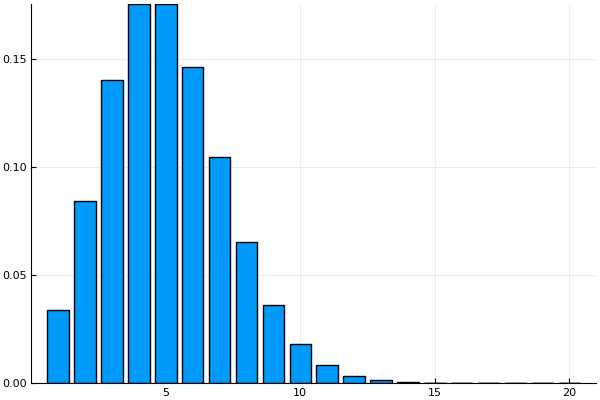

In [67]:
bar(x -> pdf(Poisson(5),x), 1:20, legend=false)

# 正态分布
$X \sim N(\mu, \sigma^2)$

$$ p(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp(- \frac{(x - \mu)^2}{2 \sigma^2}) $$

### 性质与特点
- N(0,1)有被称为标准正态分布
- 标准化变换(U变换): $u = \frac{x - \mu}{\sigma}$, $u \sim \mathcal{N}(0,1)$
- 正态分布不会被线性变换所改变。

|probability|$\mu \pm n \sigma$|
|--|--|
|0.90|1.64|
|0.95|1.96|
|0.99|2.58|

### 二项分布关联
当$n\pi$和$n(1-\pi)$均较大时，二项分布逼近于$\mathcal{N}(n, n\pi(1-\pi))$

usu. $n\pi>5$, $n(1-\pi)>5$, $n>40$

In [31]:
cdf(Normal(),1.96)-cdf(Normal(),-1.96)

0.950004209703559


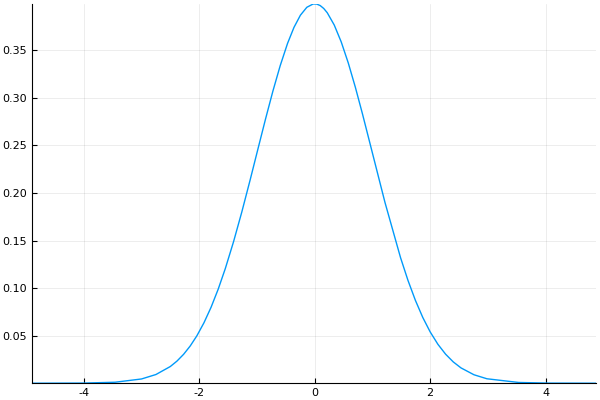

In [22]:
plot(x -> pdf(Normal(0,1),x),-5,5, legend=false)

## multivariate normal distribution

$$ {\displaystyle \mathbf {X} \ \sim \ {\mathcal {N}}_{k}({\boldsymbol {\mu }},\,{\boldsymbol {\Sigma }}),}$$

$$ {\displaystyle {\boldsymbol {\mu }}=\operatorname {E} [\mathbf {X} ]=[\operatorname {E} [X_{1}],\operatorname {E} [X_{2}],\ldots ,\operatorname {E} [X_{k}]]^{\rm {T}},} $$

$$ {\displaystyle {\boldsymbol {\Sigma }}=:\operatorname {E} [(\mathbf {X} -{\boldsymbol {\mu }})(\mathbf {X} -{\boldsymbol {\mu }})^{\rm {T}}]=[\operatorname {Cov} [X_{i},X_{j}];1\leq i,j\leq k].}$$

### PDF
$${\displaystyle {\begin{aligned}f_{\mathbf {X} }(x_{1},\ldots ,x_{k})&={\frac {\exp \left(-{\frac {1}{2}}({\mathbf {x} }-{\boldsymbol {\mu }})^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}({\mathbf {x} }-{\boldsymbol {\mu }})\right)}{\sqrt {(2\pi )^{k}|{\boldsymbol {\Sigma }}|}}}\end{aligned}}}$$

$$L(x):=\sum _{j=0}^{k}y_{j}\ell _{j}(x)$$

$$\ell _{j}(x):=\prod _{\begin{smallmatrix}0\leq m\leq k\\m\neq j\end{smallmatrix}}{\frac {x-x_{m}}{x_{j}-x_{m}}}={\frac {(x-x_{0})}{(x_{j}-x_{0})}}\cdots {\frac {(x-x_{j-1})}{(x_{j}-x_{j-1})}}{\frac {(x-x_{j+1})}{(x_{j}-x_{j+1})}}\cdots {\frac {(x-x_{k})}{(x_{j}-x_{k})}}$$

In [17]:
using SymPy
function getLagrangePloy(dataset)
    n = size(a)[1]
    @syms x
        L = 0
        for j=1:n
            ell = 1
            for m=1:n
                j == m?continue:nothing
                ell *= (x-dataset[m,1])/(dataset[j,1]-dataset[m,1])
            end
            L += dataset[j,2]*ell
        end
        expand(L)
    end;

In [ ]:
# demo
a = [
    0 1;
    1 2;
    2 4;
    3 8;
    4 16
]
demo = getLagrangePloy(a)
N(demo(5))